In [448]:
import re
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from collections import Counter
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

#First let's import the csv data into a pandas dataframe
df = pd.read_csv("./WELLCOME/WELLCOME_APCspend2013_forThinkful.csv", encoding="latin1")

#Set the dataframe column names
df.columns = ['PMID/PMCID', 'Publisher', 'Journal Title', 'Article Title','Cost']

#Assign it to a new dataframe, which we will modify or "clean"
df_clean = df

print(df_clean['Journal Title'])

0                                  Psychological Medicine
1                                       Biomacromolecules
2                                              J Med Chem
3                                              J Med Chem
4                                              J Org Chem
5                          Journal of Medicinal Chemistry
6                            Journal of Proteome Research
7                                               Mol Pharm
8                                    ACS Chemical Biology
9                                    ACS Chemical Biology
10           Journal of Chemical Information and Modeling
11                         Journal of Medicinal Chemistry
12                         Journal of Medicinal Chemistry
13                                           Biochemistry
14                         Journal of Medicinal Chemistry
15                                       Gastroenterology
16                        Journal of Biological Chemistry
17            

In [449]:
#First we will clean the journal titles

#Drop rows with at least one element missing
df_clean.dropna(inplace=True)

#Remove trailing and leading whitespace
df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).strip())

#Remove excess internal whitespace
df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: re.sub(' +', ' ', str(x)))

#Change everything first to lowercase (including acronyms)
df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).lower())

#Now capitalize the first letter of every word in each title
df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).title())

#Strip everything after a comma
df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).split(',')[0])

#Strip everything after a colon
df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).split(':')[0])

#Fix various spelling errors and inconsistent titles that I noticed from manual inspection
df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).replace('J ', 'Journal of '))

df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).replace('The Journal', 'Journal'))

df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).replace('Org ', 'Organic '))

df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).replace('Med ', 'Medicinal '))

df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).replace('Agfents', 'Agents'))

df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).replace('Americal', 'American'))

df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).replace('Antimicobial', 'Antimicrobial'))

df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).replace('Psychiatty', 'Psychiatry'))

df_clean['Journal Title'] = df_clean['Journal Title'].apply(lambda x: str(x).replace('Opthalmology', 'Ophthalmology'))

#Let's see how the data looks so far
df_clean.head(1000)

,PMID/PMCID,Publisher,Journal Title,Article Title,Cost
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,Journal of Medicinal Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,Journal of Medicinal Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,Journal of Organic Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal Of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal Of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,Acs Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,Acs Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78
10,PMCID: PMC3739413,ACS (Amercian Chemical Society) Publications,Journal Of Chemical Information And Modeling,Locating Sweet Spots for Screening Hits and Ev...,£1329.69


In [450]:
#Now let's take a quick look at the unique journal titles after cleaning
df_clean['Journal Title'].unique()

array(['Biomacromolecules', 'Journal of Medicinal Chem',
       'Journal of Organic Chem', 'Journal Of Medicinal Chemistry',
       'Journal Of Proteome Research', 'Mol Pharm', 'Acs Chemical Biology',
       'Journal Of Chemical Information And Modeling', 'Biochemistry',
       'Gastroenterology', 'Journal Of Biological Chemistry',
       'Journal Of Immunology', 'Acs Chemical Neuroscience', 'Acs Nano',
       'American Chemical Society', 'Analytical Chemistry',
       'Bioconjugate Chemistry',
       'Journal Of The American Chemical Society', 'Chest',
       'Journal Of Neurophysiology', 'Journal Of Physiology',
       'American Journal Of Psychiatry', 'Behavioral Neuroscience',
       'Emotion', 'Health Psychology', 'Journal Of Abnormal Psychology',
       'Journal Of Consulting And Clinical Psychology',
       'Journal Of Experimental Psychology',
       'Journal Of Family Psychology', 'Psychological Assessment',
       'Psychological Review', 'Psychological Trauma',
       'Americ

In [451]:
#Let's see what the top five journals are (for total articles)
print(df_clean['Journal Title'].value_counts()[:5])

Plos One                           188
Journal Of Biological Chemistry     59
Neuroimage                          28
Nucleic Acids Research              25
Plos Pathogens                      24
Name: Journal Title, dtype: int64


In [452]:
#Now we can clean up the cost values and make them numeric.
#First, we will remove the currency symbols.
df_clean['Cost'] = df_clean['Cost'].str.strip('$')
df_clean['Cost'] = df_clean['Cost'].str.strip('£')

df_clean.head(1000)

,PMID/PMCID,Publisher,Journal Title,Article Title,Cost
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,23043264 PMC3506128,ACS,Journal of Medicinal Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,ACS,Journal of Medicinal Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,ACS,Journal of Organic Chem,Regioselective opening of myo-inositol orthoes...,685.88
5,PMC3579457,ACS,Journal Of Medicinal Chemistry,Comparative Structural and Functional Studies ...,2392.20
6,PMC3709265,ACS,Journal Of Proteome Research,Mapping Proteolytic Processing in the Secretom...,2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,Acs Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,Acs Chemical Biology,Chemical proteomic analysis reveals the drugab...,1294.78
10,PMCID: PMC3739413,ACS (Amercian Chemical Society) Publications,Journal Of Chemical Information And Modeling,Locating Sweet Spots for Screening Hits and Ev...,1329.69


In [453]:
#We can convert each of the cost strings into a numeric object
df_clean['Cost'] = df_clean['Cost'].apply(lambda x: pd.to_numeric(x))
df_clean['Cost'].head()

1    2381.04
2     642.56
3     669.64
4     685.88
5    2392.20
Name: Cost, dtype: float64

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


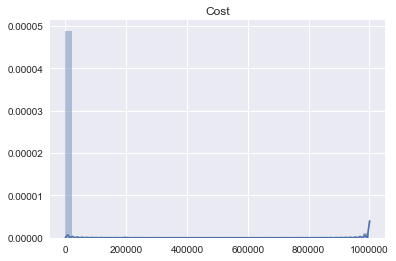

In [454]:
#Let's quickly plot the distribution of cost values (regardless of currency)
g = sns.distplot(df_clean['Cost'])
g.set(xlabel='', ylabel='', title='Cost')
plt.show()

In [455]:
#From the plot, we can see some extremely high cost amounts, close to 1000000, whereas the
#vast majority of cost amounts are at the lower end of the scale - nowhere close to 1000000.
#Sure enough, manually inspecting the data reveals many cost amounts of 999999.00. These values
#don't make sense, so we will replace them with NaN and drop them.
df_clean['Cost'] = df['Cost'].replace(999999.00, np.nan)
df_clean = df_clean.dropna()

In [456]:
#We can use numpy to get the total articles, average cost, median cost, and standard deviation
df_stats = df_clean.groupby('Journal Title', as_index=False).agg([np.count_nonzero, np.mean, np.median, 
                                                                lambda x: np.std(x, ddof=0)])

#Sort in descending order
df_stats = df_stats['Cost'].sort_values(['count_nonzero'], ascending = False)

#Store and display the results for the top five journals
df_final = df_stats

df_final.columns = ['Total Articles', 'Average Cost', 'Median Cost', 'Standard Deviation']
df_final[:5]

,Total Articles,Average Cost,Median Cost,Standard Deviation
Journal Title,,,,
Plos One,181.0,1994.896022,897.19,14211.649511
Journal Of Biological Chemistry,58.0,1418.549138,1319.55,388.900586
Neuroimage,28.0,2230.718571,2335.04,253.163560
Nucleic Acids Research,25.0,1160.880000,852.00,438.778698
Plos Pathogens,22.0,1572.866818,1600.25,158.061293
